### Graph Visualization (Scenario 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extremely important
sns.set(style="whitegrid", font_scale=1.35, rc={'figure.figsize':(11.7,5.27)}) #Change Font Size 

### Data Structure of node[1:3].txt

nodeTime nodeData loggerTime bytesTransfered

In [2]:
NUM_OF_NODE = 3
TIME = 100

"""
Save txt files into lists :
        node1.txt -> F1
        node2.txt -> F2
        ...
        node8.txt -> F8
"""
FILES = list()
for i in range(1, NUM_OF_NODE+1):
    F = open("scenario1/node" + str(i) +".txt","r")
    FILES.append(F)

### Get Delay, Server Time(1sec - 100secs)

Delays[0]: 0 - 1sec<br>
Delays[1]: 1sec - 2 secs <br>

In [3]:
Delays, Bandwidths = [[] for _ in range(TIME)], [[] for _ in range(TIME)]
lines = list()


for i, file in enumerate(FILES):
    firstLine = True
    for line in file:
        lines.append(line)
        
for i, sen in enumerate(lines):
    sen = sen.split()    
    if i == 0: 
        startTime = int(float(sen[2]))
    for j in range(TIME):
        if startTime + j <= int(float(sen[2])) < startTime + j + 1:
            delay = float(sen[2]) - float(sen[0])
            Delays[j].append(delay)
            Bandwidths[j].append(float(sen[3]))
            break

In [4]:
scenario1_delays = pd.DataFrame(Delays).T
# scenario1_delays = scenario1_delays.rename(columns={0: "1min", 1: "2mins"})
scenario1_delays
# scenario1_delays.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.006077,0.000353,0.000549,NaN,0.000506,0.00064,0.000544,0.000509,0.000431,0.000527,...,0.000521,0.000473,0.000473,0.000539,0.000532,0.000498,NaN,0.000585,NaN,0.000574
1,NaN,NaN,0.004979,NaN,0.000559,NaN,NaN,0.000460,NaN,0.000546,...,0.000450,NaN,NaN,0.000502,NaN,0.000559,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.000553,NaN,NaN,0.000480,NaN,0.000543,...,0.000432,NaN,NaN,0.000528,NaN,0.000469,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.000561,NaN,NaN,0.000438,NaN,NaN,...,0.000553,NaN,NaN,0.000470,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.000565,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.000466,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
scenario1_bandwidths = pd.DataFrame(Bandwidths).T
# scenario1_bandwidths = scenario1_bandwidths.rename(columns={0: "1min", 1: "2mins"})
scenario1_bandwidths
# scenario1_bandwidth.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,88.0,88.0,88.0,NaN,87.0,87.0,87.0,87.0,87.0,88.0,...,88.0,88.0,87.0,88.0,88.0,88.0,NaN,88.0,NaN,88.0
1,NaN,NaN,87.0,NaN,88.0,NaN,NaN,88.0,NaN,88.0,...,88.0,NaN,NaN,88.0,NaN,88.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,88.0,NaN,NaN,87.0,NaN,88.0,...,87.0,NaN,NaN,88.0,NaN,88.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,87.0,NaN,NaN,88.0,NaN,NaN,...,88.0,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


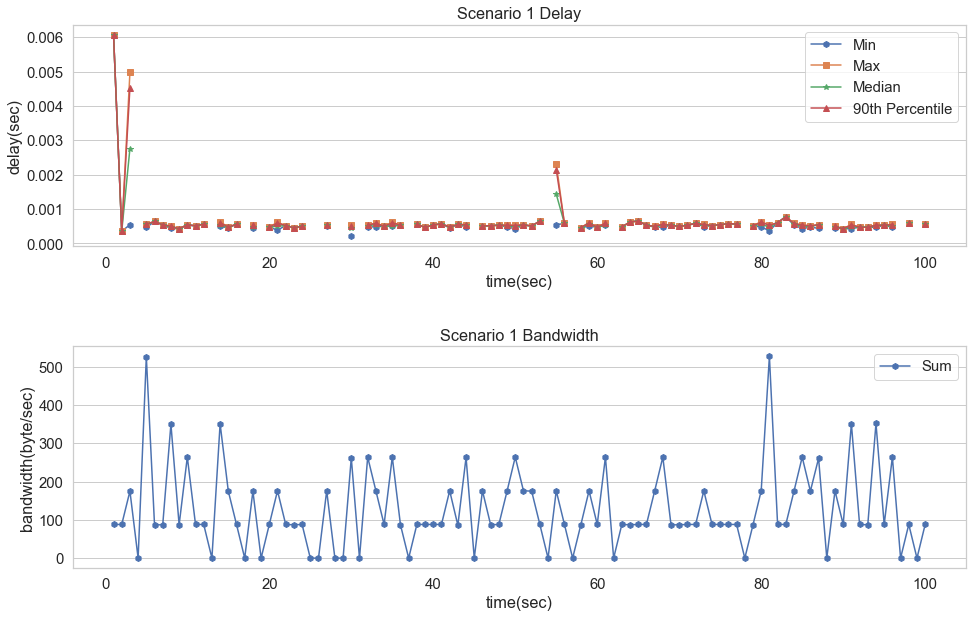

In [6]:
# Setting
timeRange = range(1, 101)
plt.subplots(figsize=(16, 10)) 
plt.subplots_adjust(hspace=.45)

# S1 Delay
ax1= plt.subplot(211)
s1d_minVal, s1d_maxVal, s1d_median, s1d_quantile90 = scenario1_delays.min(), scenario1_delays.max(), scenario1_delays.median(), scenario1_delays.quantile(.9) 
plt.plot(timeRange, s1d_minVal, marker='h')
plt.plot(timeRange, s1d_maxVal, marker='s')
plt.plot(timeRange, s1d_median, marker='*')
plt.plot(timeRange, s1d_quantile90, marker='^')
ax1.legend(['Min', 'Max', 'Median', '90th Percentile'])
ax1.set(xlabel='time(sec)', ylabel='delay(sec)', title='Scenario 1 Delay', label="max")
plt.grid(b=None, which='major', axis='x')


# S1 Bandwidth
ax2 = plt.subplot(212)
s1b_sum = scenario1_bandwidths.sum()
plt.plot(timeRange, s1b_sum, marker='h')
ax2.legend(['Sum'])
ax2.set(xlabel='time(sec)', ylabel='bandwidth(byte/sec)', title='Scenario 1 Bandwidth', label="max")
plt.grid(b=None, which='major', axis='x')